In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import bgmm.gmm as gmm
from bgmm.distributions import Gaussian, InverseGamma, Multinomial, Dirichlet
from matplotlib.mlab import normpdf
from bgmm.tests import test_gmm
import copy

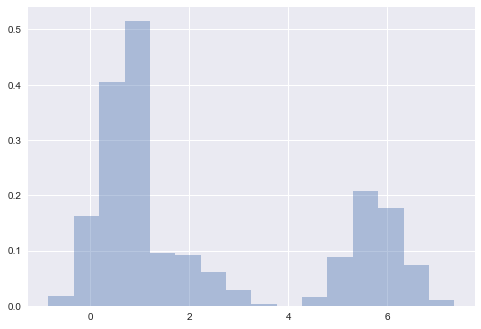

In [2]:
# Generate synthetic data
model = test_gmm.random_model()
state, X = model.forward_sample(N=5000)
X = X.reshape(len(X), 1)
seaborn.distplot(X, kde=False, norm_hist=True);

In [3]:
archive_state = copy.deepcopy(state)

In [4]:
# Initialize new randomized state
pi = np.random.dirichlet([1, 1, 1])
mu = np.random.uniform(low=0, high=6, size=model.K).reshape(model.K, model.dim)
sigma_sq_mu = np.random.uniform(low=0, high=5)
sigma_sq_n = np.random.uniform(low=0, high=0.5, size=model.K)
z = np.random.choice(list(range(model.K)), size=len(X))
state = gmm.State(pi=pi, z=z, mu=mu, sigma_sq_mu=1, sigma_sq_n=sigma_sq_n)

In [5]:
N=500
sampler = gmm.Sampler(niter=N, model=model, state=state, X=X, prior='Jeff')

In [6]:
sampler.sample()

100%|██████████| 500/500 [00:11<00:00, 45.11it/s]


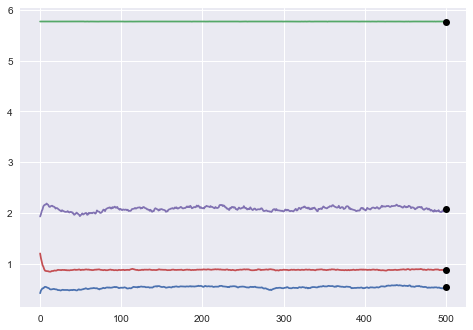

In [7]:
plt.plot(sampler.logger['mean'].reshape(N, model.K)[:]);
x = np.ones(model.K)*N
plt.plot(x, archive_state.mu, 'o', color='black');

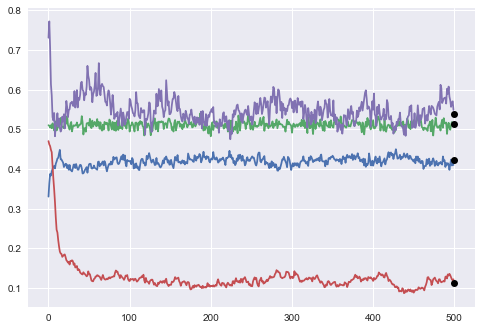

In [8]:
plt.plot(np.sqrt(sampler.logger['sigma_sq_n'][:]));
plt.plot(x, np.sqrt(archive_state.sigma_sq_n), 'o', color='black')

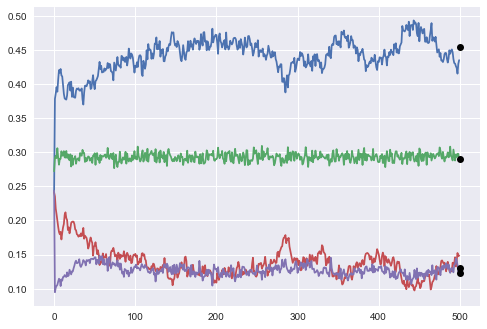

In [9]:
plt.plot(sampler.logger['pi'].reshape(N, model.K)[:]);
plt.plot(x, archive_state.pi, 'o', color='black');

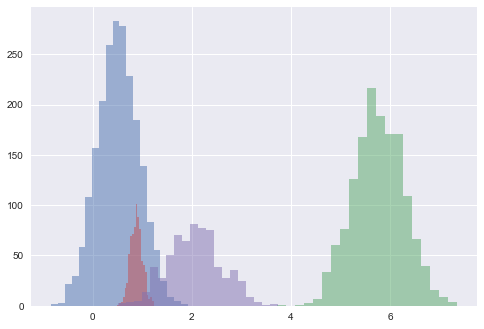

In [10]:
alpha=0.5
for i in range(model.K):
    plt.hist(X[np.where(sampler.state.z==i)], alpha=alpha, bins=20);

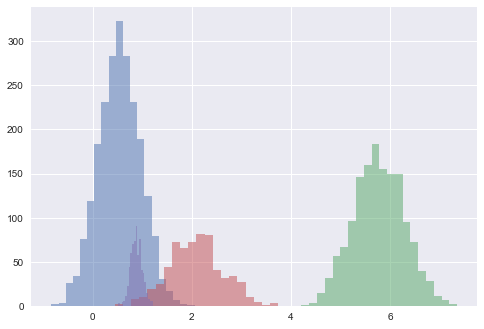

In [11]:
alpha=0.5
for i in range(model.K):
    plt.hist(X[np.where(archive_state.z==i)], alpha=alpha, bins=20);

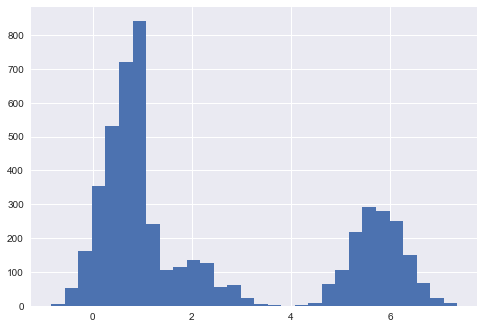

In [12]:
#seaborn.distplot(samples, kde=False)
plt.hist(X, bins=30);

In [18]:
%timeit np.flatnonzero(np.random.multinomial(1, state.pi))[0]

The slowest run took 15.02 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.99 µs per loop


In [19]:
%timeit np.where(np.random.multinomial(1, state.pi))[0][0]

The slowest run took 14.39 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.55 µs per loop
